<a href="https://colab.research.google.com/github/shivendr7/ml/blob/assignments/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16
model=VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
(train_images, train_labels), (test_images, test_labels)=load_data() 

(<matplotlib.image.AxesImage at 0x7fbf50a2ffd0>, 5)

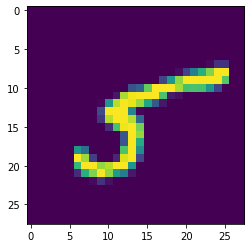

In [3]:
plt.imshow(train_images[65].reshape(28,28)), train_labels[65]

In [12]:
model=Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
#model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
"""
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))"""
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)       147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
train_images[0].shape

(28, 28)

(7, <matplotlib.image.AxesImage at 0x7fbf4d528e10>)

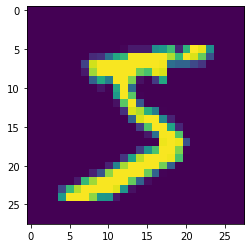

In [18]:
np.argmax(model.predict(train_images[1].reshape(1,28,28,1))), plt.imshow(train_images[0].reshape(28,28))
#without training

In [17]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)
train_images=train_images.astype('float32')
train_images/=255
test_images=test_images.astype('float32')
test_images/=255

In [9]:
train_labels=tf.keras.utils.to_categorical(train_labels, 10)
test_labels=tf.keras.utils.to_categorical(test_labels, 10)

In [10]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
train_images.shape

(60000, 28, 28, 1)

In [20]:
model.fit(train_images, train_labels, epochs=2, verbose=2)

Epoch 1/2
1875/1875 - 203s - loss: 2.3016 - accuracy: 0.1116
Epoch 2/2
1875/1875 - 201s - loss: 2.3013 - accuracy: 0.1124


(array([[0.09850921, 0.11211199, 0.10362694, 0.10045584, 0.0954339 ,
         0.0895425 , 0.0957353 , 0.10627634, 0.09893776, 0.09937017]],
       dtype=float32), <matplotlib.image.AxesImage at 0x7fbf496ef390>)

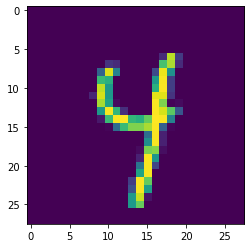

In [21]:
model.predict(train_images[26].reshape(1,28,28,1)), plt.imshow(train_images[26].reshape(28,28))

In [23]:
np.argmax(model.predict(train_images[26].reshape(1,28,28,1)))

1

In [22]:
loss,accuracy=model.evaluate(test_images, test_labels, verbose=2)

313/313 - 8s - loss: 2.3010 - accuracy: 0.1135
